In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

In [2]:
plt.rcParams["figure.dpi"] = 150

## データの生成
1-linear_fitと同様にノイズ入りのデータを生成する。

In [3]:
num_data = 30

In [4]:
np.random.seed(123)
x = np.random.rand(num_data) * 5

In [5]:
def true_model(x, a=1.5, b=-0.3):
    model = a * x + b 
    return model

In [6]:
y_true = true_model(x)

In [7]:
np.random.seed(124)
sigma_true = 0.15
noise = np.random.randn(num_data) * sigma_true
y_obs = y_true + noise

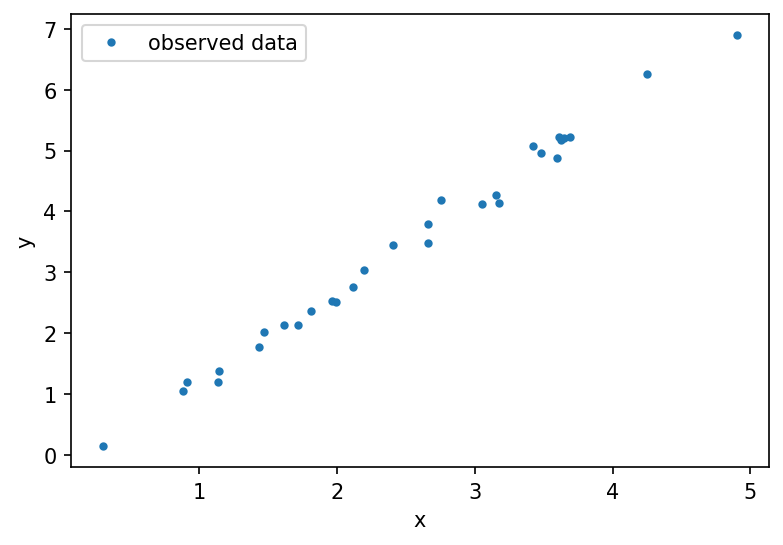

In [8]:
plt.xlabel("x")
plt.ylabel("y")
plt.errorbar(x, y_obs, fmt='o', lw=0.5, markersize=3, label='observed data')
plt.legend();

## 練習

再び$y$と$x$の関係が
$$ y = ax+b $$
で与えらえれるとして$(a,b)$を推定しよう。ただしこれまでとは異なり、測定誤差$e$の標準偏差$\sigma$は未知である（平均$0$の正規分布であることは仮定する）として、$(a,b)$だけでなく$\sigma$も同時に推定しよう。このとき$\sigma$にも適切な事前分布を設定する必要がある。